# Lab: Single Systems

# Unit 1: Classical Information
## 目的
量子情報科学の基礎となる「古典的確率論」を、線形代数で再構築する。
特に、確率ベクトルと確率行列（Stochastic Matrix）の性質をNumPyで実装し、後の量子状態（振幅）との対比の基準とする。

## 参照
* [IBM Quantum Learning: Classical information](https://quantum.cloud.ibm.com/learning/ja/courses/basics-of-quantum-information/single-systems/classical-information)

In [6]:
import numpy as np

def is_stochastic_matrix(M):
    """行列Mが確率行列(各列の和が1)か検証する"""
    column_sums = np.sum(M, axis=0)
    return np.allclose(column_sums, 1.0)

# 実験用データ
M_deterministic = np.array([[0, 1], [1, 0]])  # 決定論的 (Xゲート)
M_probabilistic = np.array([[0.5, 0.5], [0.5, 0.5]]) # 確率的 (コイン投げ)
# 和が1にならない行列
M_invalid = np.array([[0.5, 0.9], [0.5, 0.2]])

# 判定実行
print(f"Determ. Matrix Valid?: {is_stochastic_matrix(M_deterministic)}")
print(f"Prob. Matrix Valid?:   {is_stochastic_matrix(M_probabilistic)}")
print(f"Invalid Matrix Valid?: {is_stochastic_matrix(M_invalid)}")

# 演算実行
v_zero = np.array([1.0, 0.0]) # 初期状態 |0>
v_after = M_probabilistic @ v_zero # 確率的操作を実行
print(f"Result Vector: {v_after}")

Determ. Matrix Valid?: True
Prob. Matrix Valid?:   True
Invalid Matrix Valid?: False
Result Vector: [0.5 0.5]


In [8]:
# --- Quantum State (L2 Norm) Experiment ---

def is_quantum_state(v):
    """ベクトルvが量子状態(ノルムが1)か検証する"""
    # np.linalg.norm はベクトルの長さ(L2ノルム)を計算する
    norm = np.linalg.norm(v)
    return np.isclose(norm, 1.0)

# 1. 古典的な状態 (単なる0)
# |0> = [1, 0]
q_zero = np.array([1.0, 0.0])

# 2. 重ね合わせ状態 (Superposition)
# |+> = 1/√2 (|0> + |1>)
q_plus = np.array([1/np.sqrt(2), 1/np.sqrt(2)])

# 3. 複素数の状態 (Complex Amplitude)
# |i> = 1/√2 (|0> + i|1>)
q_complex = np.array([1/np.sqrt(2), 1j/np.sqrt(2)])

print(f"|0> Valid?:      {is_quantum_state(q_zero)}")
print(f"|+> Valid?:      {is_quantum_state(q_plus)}")
print(f"|i> Valid?:      {is_quantum_state(q_complex)}")

# 確率の計算実験: 確率 = |振幅|^2
# q_complex の0番目の成分の確率を計算せよ
prob_0 = np.abs(q_complex[0])**2
print(f"Prob(0) of |i>:  {prob_0:.3f}")

|0> Valid?:      True
|+> Valid?:      True
|i> Valid?:      True
Prob(0) of |i>:  0.500


In [9]:
# --- Quantum Gates Experiment ---

def is_unitary(M):
    """行列Mがユニタリ(U†U = I)か検証する"""
    # M.conj().T は共役転置 (Dagger)
    M_dagger = M.conj().T
    # 行列積を計算
    product = M_dagger @ M
    # 単位行列に近いかチェック
    return np.allclose(product, np.eye(M.shape[0]))

# 1. Hadamard Gate (H)
H = (1/np.sqrt(2)) * np.array([
    [1,  1],
    [1, -1]
])

# 2. Square Root of NOT (√NOT)
# 定義: 0.5 * [[1+i, 1-i], [1-i, 1+i]]
sqrt_NOT = 0.5 * np.array([
    [1+1j, 1-1j],
    [1-1j, 1+1j]
])

# 3. Pauli X (NOT) Gate
X = np.array([
    [0, 1],
    [1, 0]
])

print(f"Is H Unitary?:        {is_unitary(H)}")
print(f"Is √NOT Unitary?:     {is_unitary(sqrt_NOT)}")

# 実験: √NOT を2乗してみる
two_steps = sqrt_NOT @ sqrt_NOT

print("\n--- √NOT @ √NOT Result ---")
print(two_steps)
print("\nIs this equal to X (NOT)?:")
# 虚数成分がわずかに残る場合があるので、絶対値や実部で比較するテクニックもあるが
# ここでは厳密に比較してみる
print(np.allclose(two_steps, X))

Is H Unitary?:        True
Is √NOT Unitary?:     True

--- √NOT @ √NOT Result ---
[[0.+0.j 1.+0.j]
 [1.+0.j 0.+0.j]]

Is this equal to X (NOT)?:
True


Matplotlib is building the font cache; this may take a moment.


Initial State |0>:


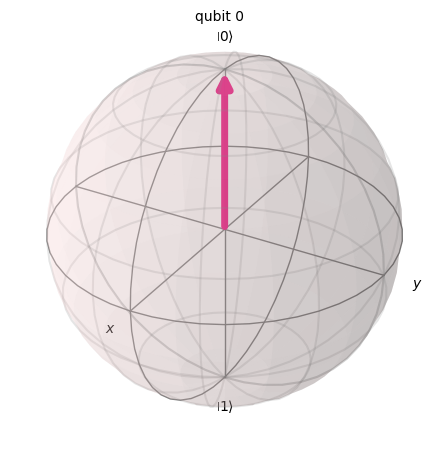

After 1st √NOT (Where is it?):


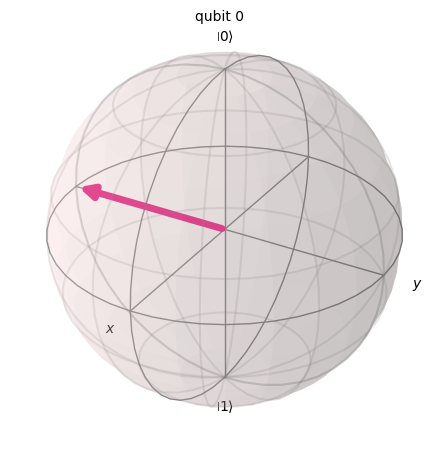

After 2nd √NOT (Should be |1>):


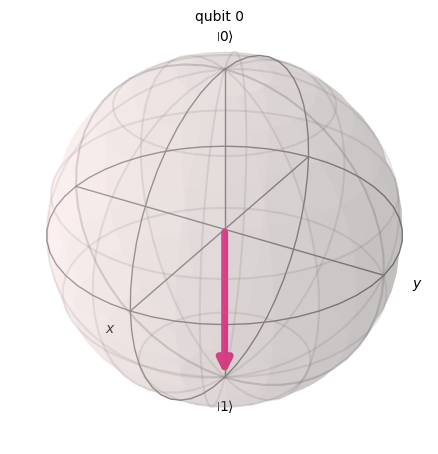

In [10]:
from qiskit.quantum_info import Statevector
from qiskit.visualization import plot_bloch_multivector
import matplotlib.pyplot as plt

# 1. 初期状態 |0> の定義
state_0 = Statevector.from_label('0')

# 2. 数学から実装へ (Link Theory to Tool)
# 先ほどNumPyで作った sqrt_NOT 行列を使って状態を進化(evolve)させる
state_step1 = state_0.evolve(sqrt_NOT)  # 1回適用
state_step2 = state_step1.evolve(sqrt_NOT) # もう1回適用

# 3. 視覚化 (Visual Proof)
print("Initial State |0>:")
display(plot_bloch_multivector(state_0))

print("After 1st √NOT (Where is it?):")
display(plot_bloch_multivector(state_step1))

print("After 2nd √NOT (Should be |1>):")
display(plot_bloch_multivector(state_step2))

---
# IBM Textbook Verification: Deterministic & Probabilistic Operations
教科書 `classical-information.ipynb` に記載されている「決定論的操作」と「確率的操作」の行列定義を実装し、検証する。